.. _nb_perm:

# Permutations

Permutations are a very particular type where each integer value occurs only once. Your algorithm to solve your optimization problem efficiently might need some customization regarding the evolutionary operators. 

In the following, two examples of permutation problems shall be provided.

## Traveling Salesman Problem (TSP)

The traditional traveling salesman problem aims to minimize the time to travel to visit each city exactly once. 
Since a permutation can start with an arbitrary number, it is advisable to avoid oranges with apples and to repair each individual to start with the index `0`. Therefore, let us define a `Repair` operator as follows: 

In [1]:
import numpy as np
from pymoo.model.repair import Repair

class StartFromZeroRepair(Repair):

    def _do(self, problem, pop, **kwargs):
        X = pop.get("X")
        I = np.where(X == 0)[1]

        for k in range(len(X)):
            i = I[k]
            x = X[k]
            _x = np.concatenate([x[i:], x[:i]])
            pop[k].set("X", _x)
            
        return pop

For permutations, the corresponding operators need to be supplied to the `GA` constructor. Here, we choose random permutations, edge recombination crossover, and inversion mutation. Also, the repair defined above is provided.
The termination is defined to consider the improvement of the last 200 generations. If the improvement is above a tolerance value (default: `f_tol=1e-6`), the algorithm is considered as terminated.

In [2]:
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.optimize import minimize
from pymoo.factory import get_algorithm, get_crossover, get_mutation, get_sampling
from pymoo.problems.single.traveling_salesman import create_random_tsp_problem
from pymoo.util.termination.default import SingleObjectiveDefaultTermination

problem = create_random_tsp_problem(30, 100, seed=1)

algorithm = GA(
    pop_size=20,
    sampling=get_sampling("perm_random"),
    crossover=get_crossover("perm_erx"),
    mutation=get_mutation("perm_inv"),
    repair=StartFromZeroRepair(),
    eliminate_duplicates=True
)

# if the algorithm did not improve the last 200 generations then it will terminate (and disable the max generations)
termination = SingleObjectiveDefaultTermination(n_last=200, n_max_gen=np.inf)

res = minimize(
    problem,
    algorithm,
    termination,
    seed=1,
)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False



In [3]:
print("Traveling Time:", np.round(res.F[0], 3))
print("Function Evaluations:", res.algorithm.evaluator.n_eval)

Traveling Time: 411.929
Function Evaluations: 8200


/Users/blankjul/workspace/pymoo-hotfix/pymoo/problems/single/traveling_salesman.py:80: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


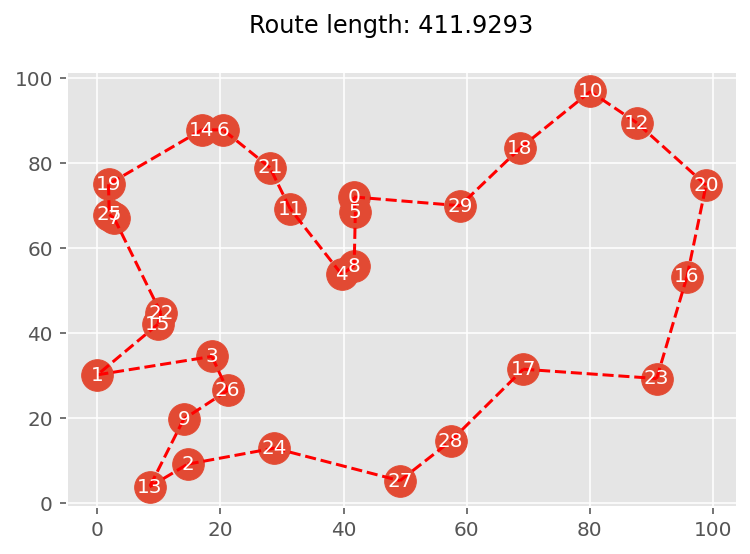

In [4]:
from pymoo.problems.single.traveling_salesman import visualize
visualize(problem, res.X)

## Flowshop Schedule

This problem is purely optimizing the permutations, and the initial value is not of importance.

In [5]:
from pymoo.problems.single.flowshop_scheduling import create_random_flowshop_problem


problem = create_random_flowshop_problem(n_machines=5, n_jobs=10, seed=1)

algorithm = GA(
    pop_size=20,
    eliminate_duplicates=True,
    sampling=get_sampling("perm_random"),
    crossover=get_crossover("perm_ox"),
    mutation=get_mutation("perm_inv"),
)

termination = SingleObjectiveDefaultTermination(n_last=50, n_max_gen=10000)

res = minimize(
    problem,
    algorithm,
    termination,
    seed=1
)

In [6]:
print("Maximum Span:", np.round(res.F[0], 3))
print("Function Evaluations:", res.algorithm.evaluator.n_eval)

Maximum Span: 1042.991
Function Evaluations: 1300


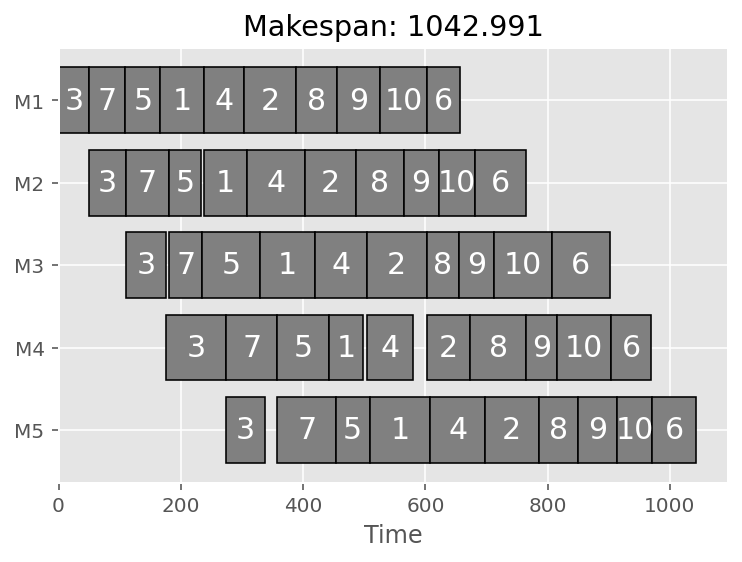

In [7]:
from pymoo.problems.single.flowshop_scheduling import visualize
visualize(problem, res.X)

<sub>This implementation is based on a contribution made by [Peng-YM](https://github.com/Peng-YM).</sub>